<h1>🍔Analysis of IT Trends in USA</h1>

dataset cleaned, created during module 1 Lab 2

<h3>🛠️Import libraries</h3>

In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 146.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 162.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 106.6 MB/s eta 0:00:00


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt  

In [15]:
!pip install folium

<h3>📂Load the files and Convert as a df</h3>

In [3]:
#load the csv file 'popular-language' : top 10 programming language and Average Salary
path1 = "/resources/DA0321EN/lab/module4/popular-languages_USA.csv"
df_popular=pd.read_csv(path1)

In [18]:
df_popular

,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


In [3]:
#load the csv file 'job_language' : Most language required by employer in job post description
path2 = "/resources/DA0321EN/lab/module4/job-postings_languages.csv"
df_job_lang =pd.read_csv(path2)

In [6]:
df_job_lang

,Languages,Number of Jobs
0,C,1237
1,C#,333
2,C++,305
3,Python,1171
4,Java,1108
5,Scala,9
6,JavaScript,355
7,PHP,636
8,R,82
9,Go,25


In [4]:
# Rename column 'Languages' in 'Language' for further df_merged
df_job_lang.rename(columns={'Languages': 'Language'}, inplace=True)

In [174]:
#load the csv file 'job_database' : Most databases required by employer in job post description
path3 = "/resources/DA0321EN/lab/module4/job_posting_databases.csv"
df_job_db =pd.read_csv(path3)

In [16]:
df_job_db

,Database,Number of Jobs
0,Oracle,784
1,MySQL,750
2,SQL Server,249
3,PostgreSQL,10
4,MongoDB,174


In [10]:
#load the csv file 'job_locations' : Cities with the most number of job posting
path5 = "/resources/DA0321EN/lab/module4/job-postings_cities.csv"
df_job_locations =pd.read_csv(path5)

In [11]:
df_job_locations

,Location,Number of Jobs
0,Los Angeles,640
1,New York,3226
2,San Francisco,435
3,Washington DC,5316
4,Boston,2966
5,Seattle,3375
6,Detroit,3945
7,Austin,434
8,Houston,3339
9,Philadelphia,41


In [13]:
total_job = df_job_locations['Number of Jobs'].sum()
total_job

np.int64(27005)

In [17]:
df_job_locations['Location'].unique()

array(['Los Angeles', 'New York', 'San Francisco', 'Washington DC',
       'Boston', 'Seattle', 'Detroit', 'Austin', 'Houston',
       'Philadelphia', 'New Orleons', 'Baltimore', 'Dallas'], dtype=object)

In [175]:
#load the csv file csv1 : language and database experiences split/exploded - worlwide survey
path6 = "/resources/DA0321EN/lab/module4/csv1_language_database_hww.csv"
df_csv1 =pd.read_csv(path6)

In [9]:
df_csv1.head()

,ResponseId,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith
0,2,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells),Dynamodb
1,2,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells),MongoDB
2,2,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells),PostgreSQL
3,2,United Kingdom of Great Britain and Northern I...,Go,Dynamodb
4,2,United Kingdom of Great Britain and Northern I...,Go,MongoDB


In [176]:
# Rename column 'DatabaseHaveWorkedWith' in 'Database' (for further df_merged
df_csv1.rename(columns={'DatabaseHaveWorkedWith': 'Database'}, inplace=True)

In [ ]:
# Rename column 'LanguageHaveWorkedWith' in 'Language' (for further df_merged
df_csv1.rename(columns={'LanguageHaveWorkedWith': 'Language'}, inplace=True)

<h3>📊Visualization</h3>

✅Bar Chart for top 10 programming languages on-demand

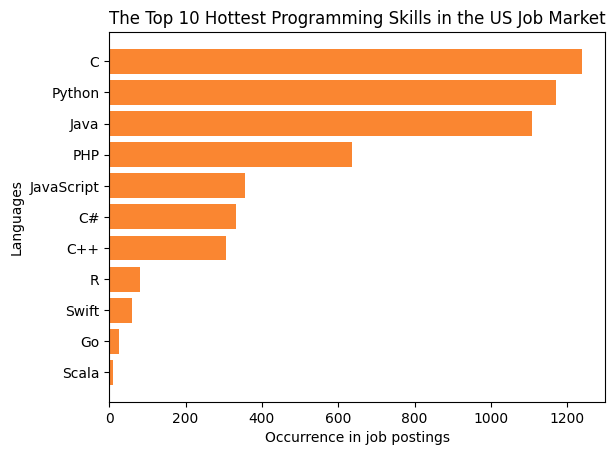

In [8]:
df_job_lang = df_job_lang.sort_values(by='Number of Jobs', ascending=True)  

#bar plot horizontal
plt.barh(df_job_lang['Language'], df_job_lang['Number of Jobs'], color='#fa8631')
plt.title('The Top 10 Hottest Programming Skills in the US Job Market')
plt.xlabel('Occurrence in job postings')
plt.ylabel('Languages')
plt.show()

✅Bar chart for top 5 databases on-demand

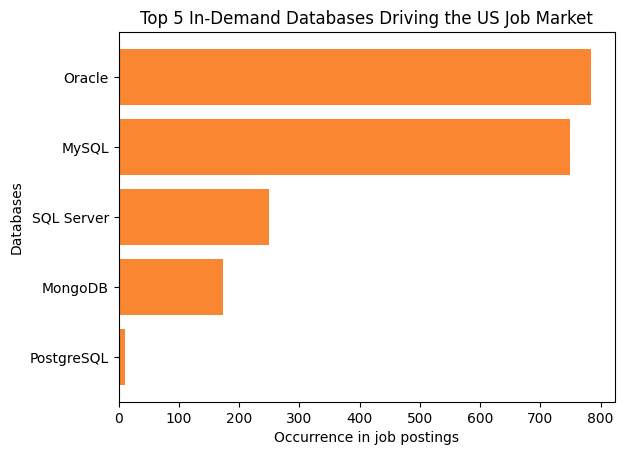

In [17]:
df_job_db = df_job_db.sort_values(by='Number of Jobs', ascending=True)  

#bar plot horizontal
plt.barh(df_job_db['Database'], df_job_db['Number of Jobs'], color='#fa8631')
plt.title('Top 5 In-Demand Databases Driving the US Job Market')
plt.xlabel('Occurrence in job postings')
plt.ylabel('Databases')
plt.show()

In [193]:
df_job_db['Database'].value_counts()

Database
Oracle        1
MySQL         1
SQL Server    1
PostgreSQL    1
MongoDB       1
Name: count, dtype: int64

✅Bar chart in-demand databse vs offer

In [194]:
#filter csv1 on USA only
df_usa_db = df_csv1[df_csv1['Country'] == 'United States of America']

In [195]:
df_usa_db['Database'].unique()

array(['Elasticsearch', 'MongoDB', 'PostgreSQL', 'SQLite', 'MySQL',
       'Microsoft SQL Server', 'BigQuery', 'Clickhouse',
       'Cloud Firestore', 'Cosmos DB', 'Supabase', 'Dynamodb', 'IBM DB2',
       'MariaDB', 'Microsoft Access', 'Neo4J', 'Oracle', 'Redis',
       'Databricks SQL', 'Snowflake', 'Couch DB', 'RavenDB', 'H2', 'Solr',
       'Cassandra', 'InfluxDB', 'Cockroachdb', 'Presto',
       'Firebase Realtime Database', 'Firebird', 'DuckDB', 'Couchbase',
       'Datomic', 'EventStoreDB', 'TiDB'], dtype=object)

In [196]:
#top 10 database in USA developper
# Count occurrences of Db
top_database = df_usa_db['Database'].value_counts().head(10) 
print(top_database)

Database
PostgreSQL              13968
MySQL                    9371
SQLite                   9339
Microsoft SQL Server     7984
Redis                    7274
MongoDB                  5907
Elasticsearch            4465
MariaDB                  4031
Dynamodb                 3788
Oracle                   2043
Name: count, dtype: int64


In [180]:
#convert top 5 into df
df_database_exp = top_database.reset_index()
df_database_exp.columns = ['Database', 'Offer']

In [197]:
df_database_exp['Database'].unique()

array(['PostgreSQL', 'MySQL', 'SQLite', 'Microsoft SQL Server', 'Redis',
       'MongoDB', 'Elasticsearch', 'MariaDB', 'Dynamodb', 'Oracle'],
      dtype=object)

In [200]:
df_database_exp['Database'] = df_database_exp['Database'].replace('Microsoft SQL Server', 'SQL Server')

In [201]:
df_database_exp['Database'].unique()

array(['PostgreSQL', 'MySQL', 'SQLite', 'SQL Server', 'Redis', 'MongoDB',
       'Elasticsearch', 'MariaDB', 'Dynamodb', 'Oracle'], dtype=object)

In [202]:
df_database_exp['Proportion_Offer'] = df_database_exp['Offer'] / df_database_exp['Offer'].sum()

In [203]:
df_job_db['Proportion_Jobs'] = df_job_db['Number of Jobs'] / df_job_db['Number of Jobs'].sum()

In [204]:
# Merge df on Language
df_merged_db = pd.merge(df_job_db,df_database_exp, on='Database')

In [205]:
df_merged_db.head(15)

,Database,Number of Jobs,Proportion_Jobs,Offer,Proportion_Offer
0,Oracle,784,0.398577,2043,0.029969
1,MySQL,750,0.381291,9371,0.137465
2,SQL Server,249,0.126589,7984,0.117119
3,PostgreSQL,10,0.005084,13968,0.204900
4,MongoDB,174,0.088460,5907,0.086651


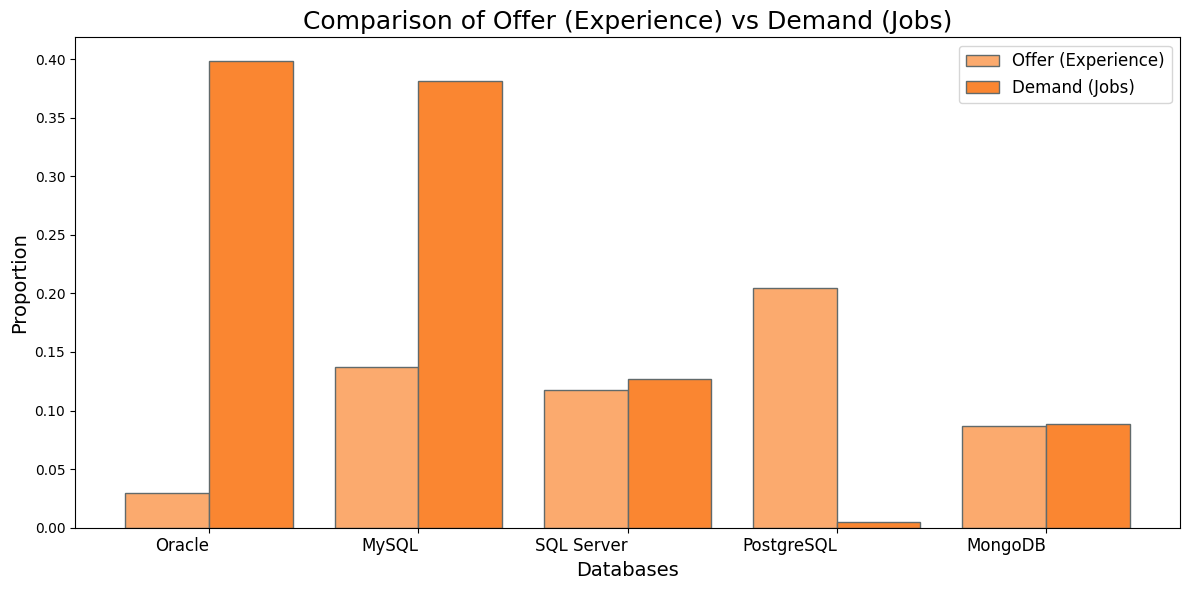

In [206]:
import numpy as np

# Positions des barres sur l'axe X
x = np.arange(len(df_merged_db['Database']))  # Nombre de langages communs
width = 0.4  # Largeur des barres

# Bar chart groupé
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, df_merged_db['Proportion_Offer'], width, label='Offer (Experience)', color='#fbaa6e', edgecolor='#616a6b')
ax.bar(x + width/2, df_merged_db['Proportion_Jobs'], width, label='Demand (Jobs)', color='#fa8631', edgecolor='#616a6b')

# Ajouter les détails du graphique
ax.set_xticks(x)
ax.set_xticklabels(df_merged_db['Database'], ha='right', fontsize=12)
ax.set_xlabel('Databases', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)
ax.set_title('Comparison of Offer (Experience) vs Demand (Jobs)',fontsize=18)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

✅Bar chart in-demand programming language vs Salary

In [93]:
# Merge df on Language
df_merged = pd.merge(df_popular, df_job_lang, on='Language')

In [94]:
df_merged.head()

,Language,Average Annual Salary,Number of Jobs,Proportion_Jobs
0,Python,"$114,383",1171,0.220113
1,Java,"$101,013",1108,0.208271
2,R,"$92,037",82,0.015414
3,Swift,"$130,801",59,0.011090
4,C++,"$113,865",305,0.057331


In [95]:
# Clean the type 'monnaie' and convert to float
df_merged['Average Annual Salary'] = df_merged['Average Annual Salary'].replace('[\$,]', '', regex=True).astype(float)


In [97]:
df_merged

,Language,Average Annual Salary,Number of Jobs,Proportion_Jobs
0,Python,114383.0,1171,0.220113
1,Java,101013.0,1108,0.208271
2,R,92037.0,82,0.015414
3,Swift,130801.0,59,0.011090
4,C++,113865.0,305,0.057331
5,C#,88726.0,333,0.062594
6,PHP,84727.0,636,0.119549
7,Go,94082.0,25,0.004699


In [98]:
# Standardization of variables
mean_salary = df_merged['Average Annual Salary'].mean()
std_salary = df_merged['Average Annual Salary'].std()

mean_jobs = df_merged['Number of Jobs'].mean()
std_jobs = df_merged['Number of Jobs'].std()

# Apply
df_merged['Salary_standardized'] = (df_merged['Average Annual Salary'] - mean_salary) / std_salary
df_merged['Jobs_standardized'] = (df_merged['Number of Jobs'] - mean_jobs) / std_jobs

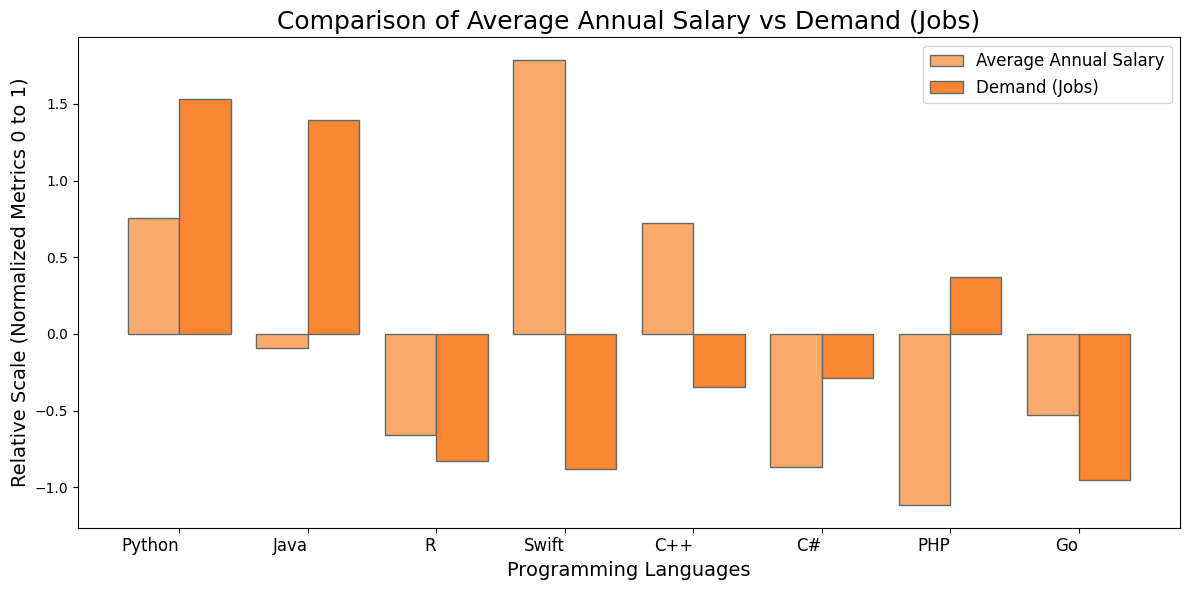

In [99]:
import numpy as np

# Positions des barres sur l'axe X
x = np.arange(len(df_merged['Language']))  # Nombre de langages communs
width = 0.4  # Largeur des barres

# Bar chart groupé
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, df_merged['Salary_standardized'], width, label='Average Annual Salary', color='#fbaa6e', edgecolor='#616a6b')
ax.bar(x + width/2, df_merged['Jobs_standardized'], width, label='Demand (Jobs)', color='#fa8631', edgecolor='#616a6b')

# Ajouter les détails du graphique
ax.set_xticks(x)
ax.set_xticklabels(df_merged['Language'], ha='right', fontsize=12)
ax.set_xlabel('Programming Languages', fontsize=14)
ax.set_ylabel('Relative Scale (Normalized Metrics 0 to 1)', fontsize=14)
ax.set_title('Comparison of Average Annual Salary vs Demand (Jobs)',fontsize=18)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

✅Bar chart offer (developper skills) vs demand (job market)

In [49]:
#filter csv1 on USA only
df_usa = df_csv1[df_csv1['Country'] == 'United States of America']

In [50]:
# Count occurrences of languages
top_languages_experience = df_usa['Language'].value_counts().head(15)  # Top 15 langages
print(top_languages_experience)

Language
JavaScript                 9819
SQL                        8760
HTML/CSS                   8107
Python                     7381
TypeScript                 7012
Bash/Shell (all shells)    6377
C#                         4384
Java                       3944
PowerShell                 3071
Go                         3041
PHP                        2622
Rust                       2277
C++                        2115
C                          1895
Ruby                       1837
Name: count, dtype: int64


In [51]:
#convert top 15 into df
df_experience = top_languages_experience.reset_index()
df_experience.columns = ['Language', 'Experience']

In [100]:
df_experience.head()

,Language,Experience,Proportion_Experience
0,JavaScript,9819,0.135170
1,SQL,8760,0.120591
2,HTML/CSS,8107,0.111602
3,Python,7381,0.101608
4,TypeScript,7012,0.096528


In [57]:
# Merge df on 'Language'
df_merged1 = pd.merge(df_job_lang, df_experience, on='Language', how='inner')

In [61]:
df_experience['Proportion_Experience'] = df_experience['Experience'] / df_experience['Experience'].sum()

In [62]:
df_job_lang['Proportion_Jobs'] = df_job_lang['Number of Jobs'] / df_job_lang['Number of Jobs'].sum()

In [63]:
df_merged2 = pd.merge(df_experience, df_job_lang, on='Language', how='inner')

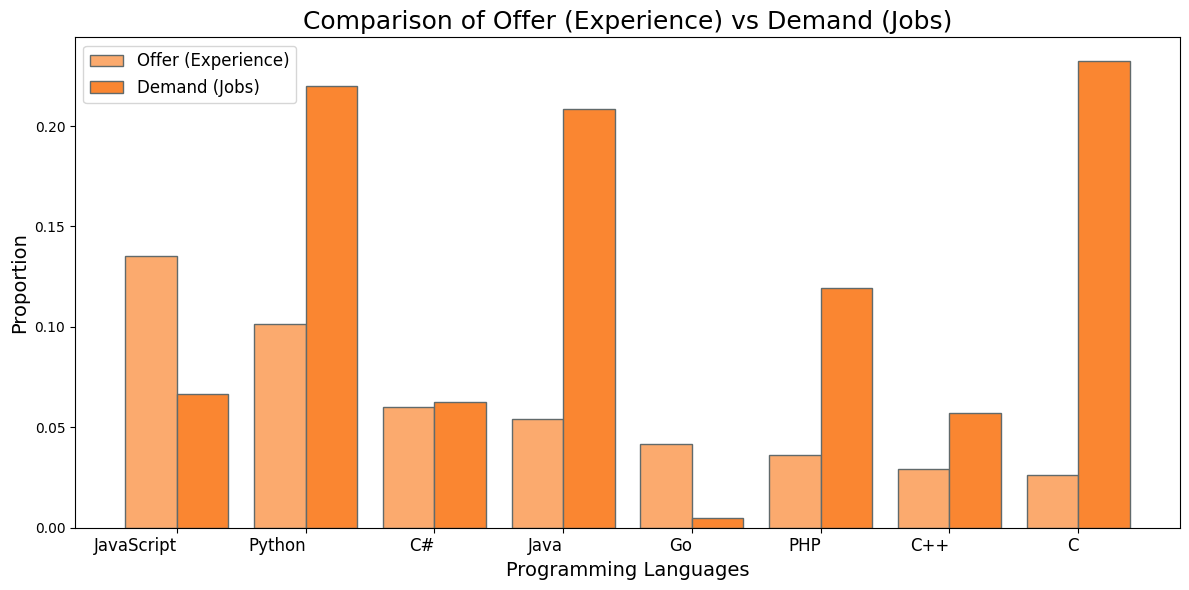

In [79]:
import numpy as np

# Positions des barres sur l'axe X
x = np.arange(len(df_merged2['Language']))  # Nombre de langages communs
width = 0.4  # Largeur des barres

# Bar chart groupé
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, df_merged2['Proportion_Experience'], width, label='Offer (Experience)', color='#fbaa6e', edgecolor='#616a6b')
ax.bar(x + width/2, df_merged2['Proportion_Jobs'], width, label='Demand (Jobs)', color='#fa8631', edgecolor='#616a6b')

# Ajouter les détails du graphique
ax.set_xticks(x)
ax.set_xticklabels(df_merged2['Language'], ha='right', fontsize=12)
ax.set_xlabel('Programming Languages', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)
ax.set_title('Comparison of Offer (Experience) vs Demand (Jobs)',fontsize=18)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

✅Bubble plot salary vs offer (experience) vs demand (jobs)

In [110]:
# Merge df on 'Language'
df_bubble = pd.merge(df_merged, df_experience, on='Language', how='inner')

In [119]:
df_bubble

,Language,Average Annual Salary,Number of Jobs,Proportion_Jobs,Salary_standardized,Jobs_standardized,Experience,Proportion_Experience,Color
0,Python,114383.0,1171,0.220113,0.752412,1.530887,7381,0.101608,#7f2704
1,Java,101013.0,1108,0.208271,-0.090908,1.394302,3944,0.054294,#fdb678
2,C++,113865.0,305,0.057331,0.719739,-0.346611,2115,0.029115,#fff5eb
3,C#,88726.0,333,0.062594,-0.865916,-0.285907,4384,0.060351,#fd9f56
4,PHP,84727.0,636,0.119549,-1.118155,0.371001,2622,0.036095,#feead5
5,Go,94082.0,25,0.004699,-0.528084,-0.953654,3041,0.041863,#feddbc


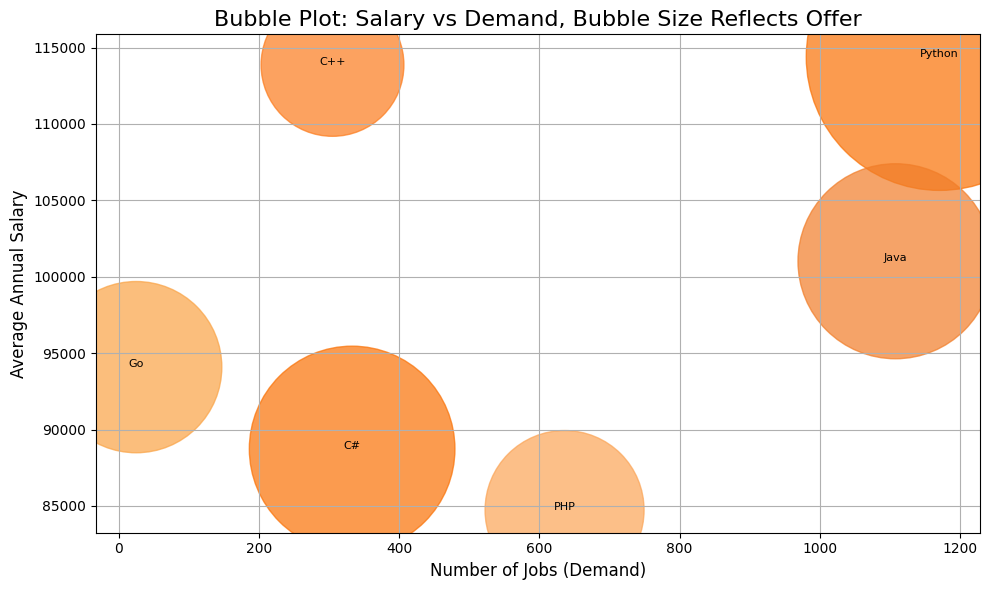

In [134]:
import matplotlib.pyplot as plt

# Définir des codes HEX pour les couleurs
colors_hex = ['#fa7105', '#f17d28', '#fc7b1c', '#fa7105', '#fba456', '#faa345']  # 6 couleurs
# python,java ,C++ ,C# , php ,Go
df_bubble['Color'] = colors_hex  #Add color to DataFrame  

# Bubble Plot
plt.figure(figsize=(10, 6))
bubble = plt.scatter(
    df_bubble['Number of Jobs'],       # Axe X : Demande
    df_bubble['Average Annual Salary'],  # Axe Y : Salaire
    s=df_bubble['Experience'] * 5,     # Taille des bulles (offre)
    alpha=0.7,                          # Transparence des bulles
    color=df_bubble['Color']            # Couleur personnalisée HEX
)

# Ajouter des annotations pour les langages
for i, lang in enumerate(df_bubble['Language']):
    plt.annotate(lang, (df_bubble['Number of Jobs'][i], df_bubble['Average Annual Salary'][i]), fontsize=8, ha='center')

# Détails du graphique
plt.title('Bubble Plot: Salary vs Demand, Bubble Size Reflects Offer', fontsize=16)
plt.xlabel('Number of Jobs (Demand)', fontsize=12)
plt.ylabel('Average Annual Salary',fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


✅Choropleth for US cities Leading the IT Job Market

In [16]:
import folium
from folium.plugins import MarkerCluster

In [18]:
# Coordinates for all cities

coordinates = {
    'New York': [40.7128, -74.0060],
    'San Francisco': [37.7749, -122.4194],
    'Los Angeles': [34.03, -118.15],
    'Washington DC': [38.5417,-770059],
    'Detroit': [42.20,-83.03],
    'Boston': [42.2137,-71.328],
    'Austin': [30.2672, -97.7431],
    'Seattle': [47.6062, -122.3321],
    'Houston': [29.4546,-95.2259],
    'Philadelphia':[39.571,-75.949],
    'New Orleons':[29.5834,-90.442], 
    'Baltimore':[39.1722,-76.3655], 
    'Dallas':[32.4645,-96.4832]
}
df_job_locations['Latitude'] = df_job_locations['Location'].map(lambda x: coordinates[x][0])
df_job_locations['Longitude'] = df_job_locations['Location'].map(lambda x: coordinates[x][1])

# Create a map center on the USA
usa_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add cities with a proportional circle related to the number of jobs
for index, row in df_job_locations.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Number of Jobs'] / 100,  # Adjust circle size
        color='#fa8631',
        fill=True,
        fill_color='#fa8631',
        fill_opacity=0.6,
        popup=f"{row['Location']}: {row['Number of Jobs']} jobs"
    ).add_to(usa_map)

# Save the html map
usa_map.save('usa_jobs_map.html')

# Display into the notebook
usa_map